***Building and Training neural networks with Tensorflow***

We are going to train a network to classify the mnist dataset. The mnist dataset is a collection of handwritten digits. 


*** Importing and shaping the input data ***

Write a script that will import the mnist dataset. 
This can be done by using:

    tensorflow.keras.datasets.mnist.load_data()  

Make sure that you correctly separate the images and the labels in a training and testing set.

Before we start feeding our data into the model we will need to reshape our input into a format that the model can read. 
The original shape of the input (train images) is [60000 , 28 , 28] (i.e. 60000 images of 28px*28px). For this you can use:
    
    reshape()
    astype()
    
Additionally we will need to encode the label data.
We will use categorical encoding, which in essence turns a number of features in numerical representations.

    to_categorical()

In [9]:
# Here we will import all the necesssary packages for this assignment

from __future__ import absolute_import, division, print_function, unicode_literals

#other helpful libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing tensorflow and keras
import tensorflow as tf
#from tensorflow import keras
gpu=len(tf.config.list_physical_devices('GPU'))
print('# of gpus %s' % gpu)

print(tf.__version__)

from tensorflow.keras.datasets import mnist             # we are importing the mnist dataset
from tensorflow.keras import models                     # this is a module which will help us build the NN
from tensorflow.keras import layers                     # this is a module which will help us build the NN
from tensorflow.keras.utils import to_categorical       # this is used for data encoding (more on it later)
from tensorflow.keras.callbacks import EarlyStopping    # this is a module used in early stopping


# of gpus 1
2.9.1


In [10]:
len(train_images0)

60000

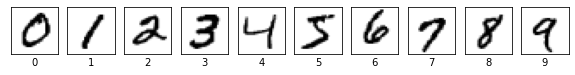

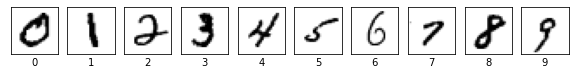

In [15]:
#Now import the MNIST dataset, and split it into 2 distinct sets of images and labels: one for training and one for testing.
(train_images0,train_labels0),(test_images0,test_labels0)=mnist.load_data()

# Before we start feeding our data into the model we will need to reshape our input into a format that the model can read. 
# The original shape of the input (train images) is [60000 , 28 , 28] 60000img of 28px*28px
train_images = train_images0.reshape((len(train_images0),28*28))
train_images = train_images.astype('float32')/255 # normalized between 0 and 1 to avoid weights explosion 
test_images = test_images0.reshape((len(test_images0),28*28))
test_images = test_images.astype('float32')/255


# additionally we will need to encode the label data.
# We will use categorical encoding, which in essence turns a number of features in numerical representations

train_labels = to_categorical(train_labels0)
test_labels = to_categorical(test_labels0) # turns 5 into [0,0,0,0,1,0,0,0,0]


class_names=np.unique(train_labels0)
# print one image per class
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind=np.where(train_labels0==class_names[i])[0][0]
    plt.imshow(train_images0[ind], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels0[ind]])
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind=np.where(train_labels0==class_names[i])[0][1]
    plt.imshow(train_images0[ind], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels0[ind]])
plt.show()

In [16]:
print(train_images.shape)
print(test_labels)

(60000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


***Problem 2.*** Build and train a dense neural network using tensorflow. For this problem consider a general network with L layers and use early stopping to avoid overfitting.

*p.s. Use a large number (>75) of epochs for training.*

Hint: you may use code from https://www.tensorflow.org/tutorials/keras/classification

In [18]:
def classifier(layerHidden,train_images,train_labels,number_of_epochs=100):
    
    #Now that we have sorted the dataset, we can proceed in building our model.

    L=len(layerHidden)# L layer model

    network = models.Sequential()
    if L==0:
        network.add(layers.Dense(10,kernel_initializer='he_normal',activation='softmax',input_shape=(28*28,)))
    if L>0:
        network.add(layers.Dense(layerHidden[0],kernel_initializer='he_normal',activation='relu',input_shape=(28*28,)))
        if L>1:
            for i in range(L-1):
                network.add(layers.Dense(layerHidden[i+1],kernel_initializer='he_normal',activation='relu'))
        network.add(layers.Dense(10,kernel_initializer='he_normal',activation='softmax'))
    # network.compile(optimizer = 'adam',
    #                 metrics = ['accuracy'])                                        # once our model has been defined, we compile it with the optimizer, loss function and the matrics used to judge the performance
    network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    print(network.summary())

    # Now we have our data split into training and test sets, our model is compiled and all our data is reshaped and encoded.
    # split into smaller training set and validation set
    X_train0,X_val,y_train0,y_val=train_test_split(train_images,train_labels,test_size=0.33)
    # write callback for early stopping
    cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=5)
    
    # We are ready to train our Neural Network
    history=network.fit(X_train0,y_train0,epochs=number_of_epochs,batch_size=100,callbacks=[cb],validation_data=(X_val,y_val),verbose=0)
    # To train the NN we will use the fit function and pass in our required parameters
    # Trains the model for a fixed number of epochs (iterations on a dataset).


    return network, history

# Here we pass in our training images and their labels as well as epochs, which dictate the number of backward and forward propagations,
# and the batch_size, which indicates the number of training samples per backwards/forward propagation

number_of_epochs =32

layerSet=[[],[32,32],[500,500,500,500,500]] # elements=# of networks we train, and nested we have each network's architecture
train_data={}
accuracy=[]; loss=[]
for i in range(len(layerSet)):
    train_data[i]={}
# train first network
network0,history0=classifier(layerSet[0],train_images=train_images,train_labels=train_labels,number_of_epochs=number_of_epochs)
train_data[0]['history']=history0
train_data[0]['network']=network0
test_loss,test_acc=network0.evaluate(test_images,test_labels)
accuracy.append(test_acc); loss.append(test_loss)

# train second network
network1,history1=classifier(layerSet[1],train_images=train_images,train_labels=train_labels,number_of_epochs=number_of_epochs)
train_data[1]['history']=history1
train_data[1]['network']=network1
test_loss,test_acc=network1.evaluate(test_images,test_labels)
accuracy.append(test_acc); loss.append(test_loss)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
313/313 [==============================] - 2s 7ms/step - loss: 0.2721 - accuracy: 0.9266
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
  

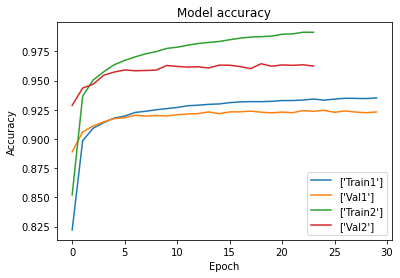

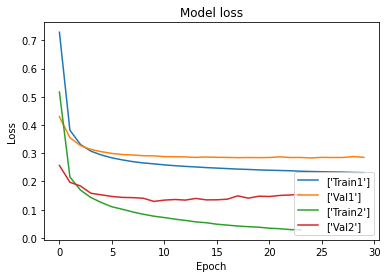

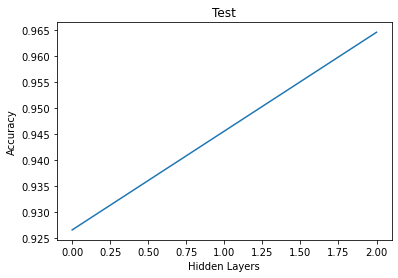

In [21]:
# Plot training & validation accuracy values
legendlab=[]
plt.plot(train_data[0]['history'].history['accuracy'])
plt.plot(train_data[0]['history'].history['val_accuracy'])
legendlab.append(['Train1']); legendlab.append(['Val1']);
plt.plot(train_data[1]['history'].history['accuracy'])
plt.plot(train_data[1]['history'].history['val_accuracy'])
legendlab.append(['Train2']); legendlab.append(['Val2']);
# plt.plot(network10.history.history['accuracy'])
# plt.plot(network10.history.history['val_accuracy'])
# legendlab.append(['Train5']); legendlab.append(['Val5']);
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(legendlab, loc='lower right')
plt.show()

# Plot training & validation accuracy values
legendlab=[]
plt.plot(train_data[0]['history'].history['loss'])
plt.plot(train_data[0]['history'].history['val_loss'])
legendlab.append(['Train1']); legendlab.append(['Val1']);
plt.plot(train_data[1]['history'].history['loss'])
plt.plot(train_data[1]['history'].history['val_loss'])
legendlab.append(['Train2']); legendlab.append(['Val2']);
# plt.plot(network10.history.history['loss'])
# plt.plot(network10.history.history['val_loss'])
# legendlab.append(['Train5']); legendlab.append(['Val5']);
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(legendlab, loc='lower right')
plt.show()

# plt.plot([2,5,10],accuracy)
plt.plot([len(x) for x in layerSet],accuracy)
plt.title('Test')
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layers')
plt.show()


Plot one example misclassified image for each class from the test set. For each misclassified image, plot a histogram showing the predicted outputs (a vector whose size is the number of classes and whose entries is the network output for that image - hint: use model.predict), and the true label. Can you speculate on why the digits where misclassified? Did the different architectures yield the same mistakes in classification?

313/313 [==============================] - 1s 2ms/step


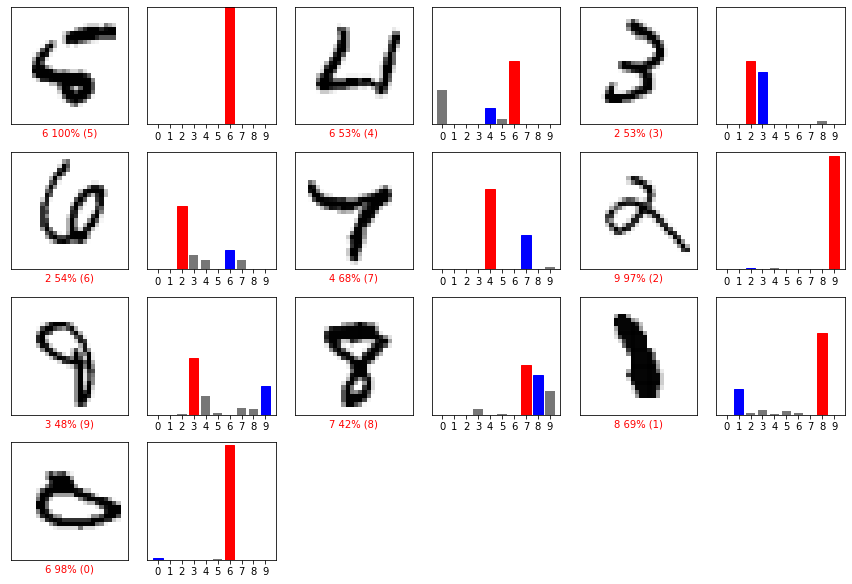

313/313 [==============================] - 1s 2ms/step


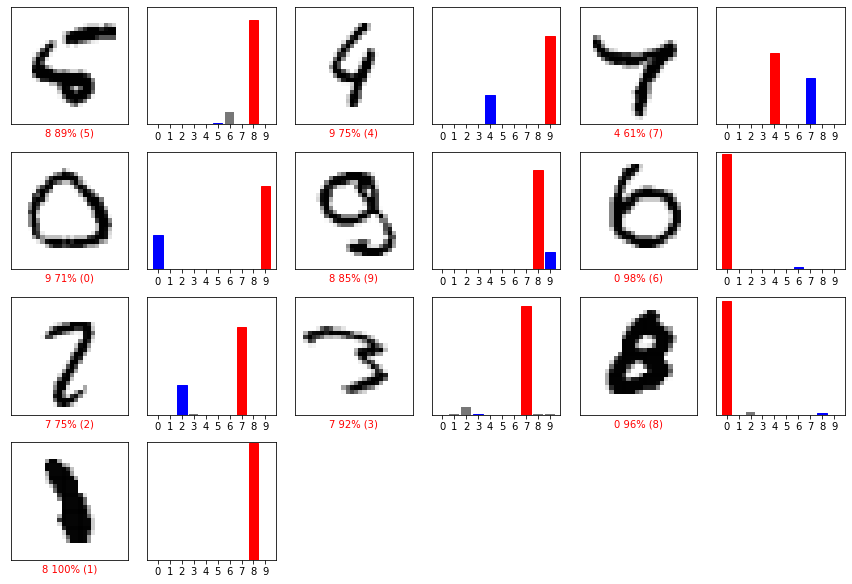

In [23]:
def plot_mistakes(network,test_images,test_labels0):

    def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      img=img.reshape(28,28)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

    def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(10))
      plt.yticks([])
      thisplot = plt.bar(range(10), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')

    predictions = network.predict(test_images)

    predictions_labels=np.argmax(predictions,axis=1)
    indwrong=np.where(~(predictions_labels==test_labels0))
    test_labels_wrong=test_labels0[indwrong[0]]
    test_images_wrong=test_images[indwrong[0]]
    predictions_wrong=predictions[indwrong[0]]
    plot_labels=np.zeros((1,len(np.unique(test_labels_wrong))))
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    cnt=0
    for i in range(len(test_labels_wrong)):
        # plot one image per class
        if plot_labels[0][test_labels_wrong[i]]==0:
            plot_labels[0][test_labels_wrong[i]]=1
            plt.subplot(num_rows, 2*num_cols, 2*cnt+1)
            plot_image(i, predictions_wrong[i], test_labels_wrong, test_images_wrong)
            plt.subplot(num_rows, 2*num_cols, 2*cnt+2)
            plot_value_array(i, predictions_wrong[i], test_labels_wrong)
            cnt+=1
    plt.tight_layout()
    plt.show()

plot_mistakes(network0,test_images,test_labels0)
plot_mistakes(network1,test_images,test_labels0)

***Problem 3.*** Consider the same networks from problem 2, with 2,5,10 layers, but now consider two sets of networks, one set with with large (500) and on set with small (10) number of nodes per layer. Add a drop out rate. 
Consider the following drop out rates:
    
    dropout_rates = [0.1, 0.3, 0.5, 0.7, 0.9]

Compare the classification accuracy on the test set: which networks generalized better? Explain your findings. 

*p.s. Use a large number (>50) of epochs for training.*

In [27]:
# def classifierDropout(layerHidden,dropout_rate,number_of_epochs=100):
def classifierDrop(layerHidden,dropout_rate,train_images,train_labels,number_of_epochs=100):
    
    #Now that we have sorted the dataset, we can proceed in building our model.

    L=len(layerHidden)# L layer model

    network = models.Sequential()
    if L==0:
        network.add(layers.Dense(10,kernel_initializer='he_normal',activation='softmax',input_shape=(28*28,)))
        network.add(layers.Dropout(dropout_rate,noise_shape=None,seed=None))
    if L>0:
        network.add(layers.Dense(layerHidden[0],kernel_initializer='he_normal',activation='relu',input_shape=(28*28,)))
        network.add(layers.Dropout(dropout_rate,noise_shape=None,seed=None))
        if L>1:
            for i in range(L-1):
                network.add(layers.Dense(layerHidden[i+1],kernel_initializer='he_normal',activation='relu'))
                network.add(layers.Dropout(dropout_rate,noise_shape=None,seed=None))
        network.add(layers.Dense(10,kernel_initializer='he_normal',activation='softmax'))
        network.add(layers.Dropout(dropout_rate,noise_shape=None,seed=None))
    # network.compile(optimizer = 'adam',
    #                 metrics = ['accuracy'])                                        # once our model has been defined, we compile it with the optimizer, loss function and the matrics used to judge the performance
    network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    print(network.summary())

    # Now we have our data split into training and test sets, our model is compiled and all our data is reshaped and encoded.
    # split into smaller training set and validation set
    X_train0,X_val,y_train0,y_val=train_test_split(train_images,train_labels,test_size=0.33)
    # write callback for early stopping
    cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=5)
    
    # We are ready to train our Neural Network
    history=network.fit(X_train0,y_train0,epochs=number_of_epochs,batch_size=100,callbacks=[cb],validation_data=(X_val,y_val),verbose=0)
    # To train the NN we will use the fit function and pass in our required parameters
    # Trains the model for a fixed number of epochs (iterations on a dataset).


    return network, history



dropout_rates=[0.5,0.9]
dropout_rates=[0.1,0.3,0.5,0.7,0.9]
layerSetsmall=[[],[16,16]]
layerSetlarge=[[],[1024,1024]]

accuracysmall=np.zeros((len(layerSetsmall),len(dropout_rates)))
losssmall=np.zeros((len(layerSetsmall),len(dropout_rates)))
for i in range(len(layerSetsmall)):
    for j in range(len(dropout_rates)):
        network,history=classifierDrop(layerSetsmall[i],dropout_rates[j],train_images,train_labels,number_of_epochs)
        test_loss, test_acc=network.evaluate(test_images,test_labels)
        accuracysmall[i,j]=test_acc
        losssmall[i,j]=test_loss
        
accuracylarge=np.zeros((len(layerSetlarge),len(dropout_rates)))
losslarge=np.zeros((len(layerSetlarge),len(dropout_rates)))
for i in range(len(layerSetlarge)):
    for j in range(len(dropout_rates)):
        network,history=classifierDrop(layerSetlargel[i],dropout_rates[j],train_images,train_labels,number_of_epochs=1)
        test_loss, test_acc=network.evaluate(test_images,test_labels)
        accuracylarge[i,j]=test_acc
        losslarge[i,j]=test_loss
# Plot test values
legendlab=[]
for i in range(len(layerSetsmall)):
    plt.plot(dropout_rates,accuracysmall[i,:])
    legendlab.append(len(layerSetsmall[i]))
plt.title('Model accuracy - small')
plt.ylabel('test accuracy')
plt.xlabel('dropout rate')
plt.legend(legendlab,title='# of layers', loc='lower right')
plt.show()

# Plot test values
legendlab=[]
for i in range(len(layerSetlarge)):
    plt.plot(dropout_rates,accuracylarge[i,:])
    legendlab.append(len(layerSetlarge[i]))
plt.title('Model accuracy - large')
plt.ylabel('test accuracy')
plt.xlabel('dropout rate')
plt.legend(legendlab,title='# of layers', loc='lower right')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
313/313 [==============================] - 1s 4ms/step - loss: 0.2771 - accuracy: 0.9222
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
  

KeyboardInterrupt: 